# Capstone Project: Predict Amazon Book Review Ratings using  Sentiment Analysis

## Exploratory Data Analysis (EDA)


_By: Jin Park_

---
### Objectives
 
- The purpose of the exploratory data analysis (EDA) is to understand the data structures and find hidden patterns by analyzing the data sets to summarize the main characteristics and creating the visual statistical models.
- Examine the overall distributions of the dataset.
- Explore the distributions of length of text and summary reviews data by rating.
- Using the CountVectorizer, identify the top least and most frequently occurring words in reviews by using different n-gram range.
- Conduct sentiment analysis for text and summary reviews.
- Examine overall correlations in the dataset.

---
### Project Guide (EDA)
- [Imports](#Imports)
- [Exploratory Data Analysis](#Exploratory Data Analysis)
    - [Rating and Helpful Columns Distribution](#Rating and Helpful Columns Distribution)
    - [Length of Reviews for Text and Summary by Rating](#Length of Reviews for Text and Summary by Rating)
    - [Top Least Occuring Words in Text and Summary ngram 1 ~ 3](#Top Least Occuring Words in Text and Summary ngram 1 ~ 3)
    - [Top Most Occuring Words](#Top Most Occuring Words)
        - [Overall Most Frequent Words in Review Text and Summary Using Word Clouds](#Overall Most Frequent Words in Review Text and Summary Using Word Clouds)
        - [Top Most Frequent Occurring Words ngram-range 1](#Top Most Frequent Occurring Words ngram-range 1)
        - [Top Most Frequent Occurring Words ngram-range 2](#Top Most Frequent Occurring Words ngram-range 2)
        - [Top Most Frequent Occurring Words ngram-range 3](#Top Most Frequent Occurring Words ngram-range 3)

    - [Most Frequent Words in Text by High Rating vs Low Rating](#Most Frequent Words in Text by High Rating vs Low Rating)    
        - [Review Text High Rating ngram 1 ~ 3](#Review Text High Rating ngram 1 ~ 3)
        - [Review Text Low Rating ngram 1 ~ 3](#Review Text Low Rating ngram 1 ~ 3)
        - [Review Summary High Rating ngram 1 ~ 3](#Review Summary High Rating ngram 1 ~ 3)
        - [Review Summary Low Rating ngram 1 ~ 3](#Review Summary Low Rating ngram 1 ~ 3)
- [Sentiment Analysis By Using TextBlob](#Sentiment Analysis By Using TextBlob)
    - [Amazon Book Reviews Sentiment and Subjectivity Distribution](#Amazon Book Reviews Sentiment and Subjectivity Distribution)
    - [Amazon Book Reviews Sentiment and Subjectivity Distribution By Ratings](#Amazon Book Reviews Sentiment and Subjectivity Distribution By Ratings)
    - [Polarity and Subjectivity Level By Book Category](#Polarity and Subjectivity Level By Book Category)
- [Correlation Heatmap](#Correlation Heatmap)
- [Save Data for Modeling](#Save Data for Modeling)

<a id='Imports'></a>
## Imports

In [1]:
import time
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pprint import pprint
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Load cleaned data sets
amazon = pd.read_csv('data/amazon_sample_eda.csv')

In [3]:
amazon.head()

,review_date,reviewer_id,reviewer_name,book_category,review_text,review_summary,rating,helpful_review
0,2006-01-18,A3SHA4Y9DHEK39,Chad Oberholtzer,Christian Books & Bibles,live church culture holiness rarely mentioned ...,great one,5,0
1,2008-03-16,A11M98R135HMSY,Paul Skinner,"Mystery, Thriller & Suspense",philip craigs finally got around first j w jac...,begining beautiful relationship,5,1
2,2013-02-26,AD20B29YQDZYQ,Amazon Customer,Literature & Fiction,storyline good reason finished filled way much...,ok,2,1
3,2013-07-16,AZR6CYHTQ9TL,Inez,Science Fiction & Fantasy,love apocalypse stories one really creeped lik...,oh bugs everywhere,5,1
4,2013-04-14,A14BTJRH9VNLJJ,Kurt A. Johnson,Biographies & Memoirs,sociopath sociopath person little conscience p...,interesting thought provoking,4,1


In [4]:
amazon.isnull().sum()

review_date        0
reviewer_id        0
reviewer_name      0
book_category      0
review_text        0
review_summary    55
rating             0
helpful_review     0
dtype: int64

In [5]:
amazon.dropna(inplace=True)

In [6]:
amazon.isnull().sum()

review_date       0
reviewer_id       0
reviewer_name     0
book_category     0
review_text       0
review_summary    0
rating            0
helpful_review    0
dtype: int64

In [7]:
amazon.columns

Index(['review_date', 'reviewer_id', 'reviewer_name', 'book_category',
       'review_text', 'review_summary', 'rating', 'helpful_review'],
      dtype='object')

<a id='Exploratory Data Analysis'></a>
# Exploratory Data Analysis
Overall, Amazon customers tend to give more positive rating than the low rating and there are more helpful counts than not helpful counts. The obvious finding is that as rating increases, the helpful count will simply increase because since there are more high rating and high helpful counts, this will overlap and increases together.

The distribution of text review is much larger than the summary review. This is because the text review contains more detailed product reviews whereas the summary review contains just the summaries. However, as rating increases review length also increases for both text and summary review. This explains that the Amazon customers are willing to write longer reviews as rating increases.

<a id='Rating and Helpful Columns Distribution'></a>
### Rating and Helpful Columns Distribution

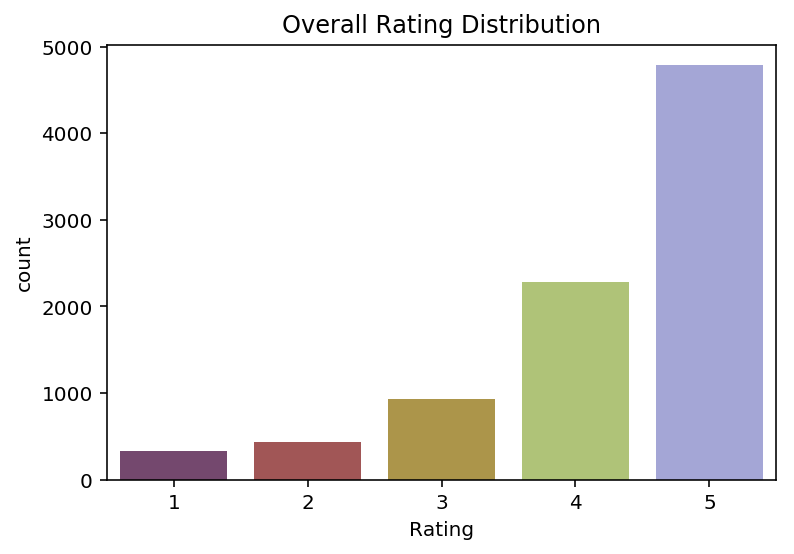

In [8]:
sns.countplot(x="rating", data=amazon, palette="tab20b_r")
plt.xlabel('Rating')
plt.title('Overall Rating Distribution')
plt.show();

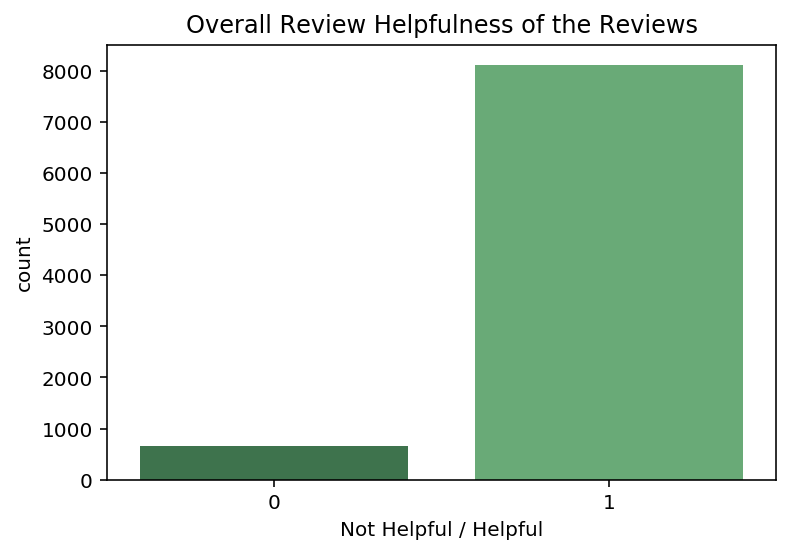

In [9]:
# Plot a bargraph to see the distribution of helpful column
sns.countplot(x="helpful_review", data=amazon, palette="Greens_d")
plt.xlabel('Not Helpful / Helpful')
plt.title('Overall Review Helpfulness of the Reviews')
plt.show();

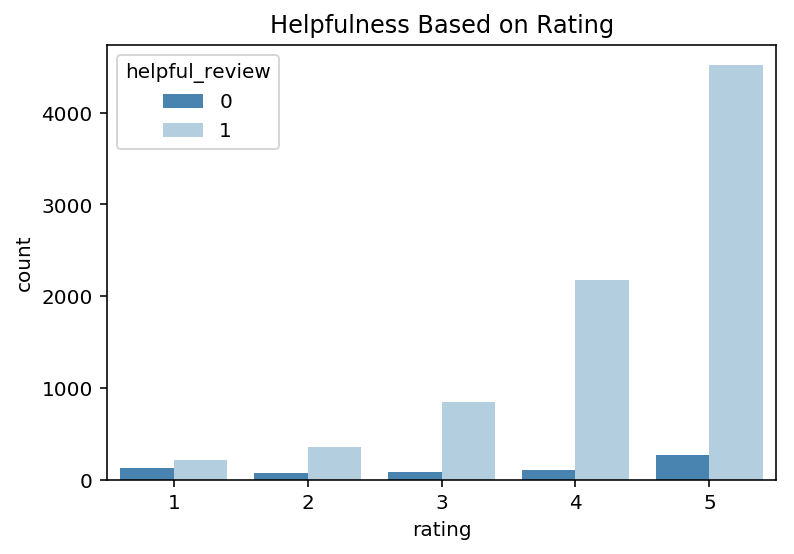

In [10]:
# Plot a bargraph that shows the difference in helpful based on rating
sns.countplot(x="rating", hue='helpful_review', data=amazon, palette="Blues_r")
plt.xlabel('rating')
plt.title('Helpfulness Based on Rating')
plt.show();

<a id='Length of Reviews for Text and Summary'></a>
### Length of Reviews for Text and Summary

In [11]:
def length(text):    
    return len(text)

In [12]:
review_text_length = amazon['review_text'].apply(length)
review_summary_length = amazon['review_summary'].apply(length)

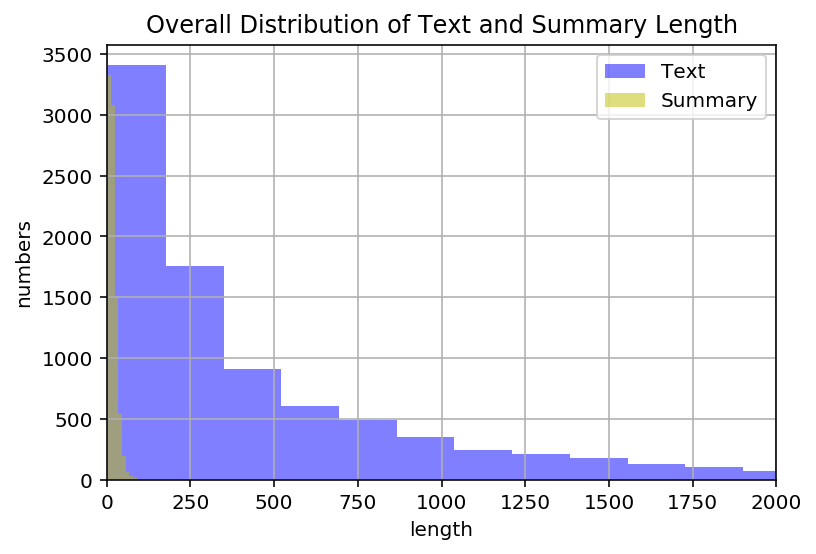

In [13]:
plt.hist(review_text_length, alpha = 0.5, bins=50, color='b', label='Text')
plt.hist(review_summary_length, alpha = 0.5, color='y', label='Summary')
plt.title('Overall Distribution of Text and Summary Length')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,2000)
plt.grid()
plt.show();

<a id='Length of Reviews for Text and Summary by Rating'></a>
### Length of Reviews for Text and Summary by Rating

In [14]:
# Boolean filtering to get each ratings text data
text_rating_5 = amazon[amazon['rating'] == 5]['review_text']
text_rating_4 = amazon[amazon['rating'] == 4]['review_text']
text_rating_3 = amazon[amazon['rating'] == 3]['review_text']
text_rating_2 = amazon[amazon['rating'] == 2]['review_text']
text_rating_1 = amazon[amazon['rating'] == 1]['review_text']

summ_rating_5 = amazon[amazon['rating'] == 5]['review_summary']
summ_rating_4 = amazon[amazon['rating'] == 4]['review_summary']
summ_rating_3 = amazon[amazon['rating'] == 3]['review_summary']
summ_rating_2 = amazon[amazon['rating'] == 2]['review_summary']
summ_rating_1 = amazon[amazon['rating'] == 1]['review_summary']

In [15]:
text_rating5_len = text_rating_5.apply(length)
text_rating4_len = text_rating_4.apply(length)
text_rating3_len = text_rating_3.apply(length)
text_rating2_len = text_rating_2.apply(length)
text_rating1_len = text_rating_1.apply(length)

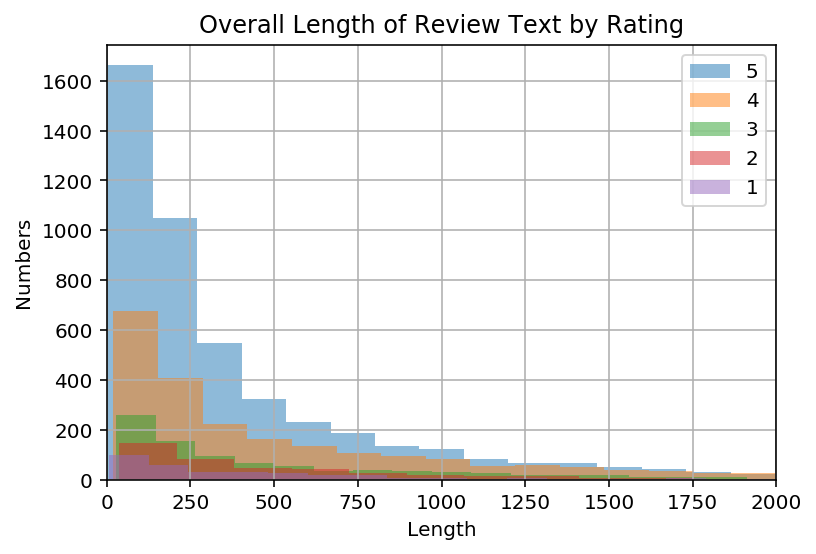

In [16]:
plt.hist(text_rating5_len, alpha = 0.5, bins=50, label='5')
plt.hist(text_rating4_len, alpha = 0.5, bins=50, label='4')
plt.hist(text_rating3_len, alpha = 0.5, bins=50, label='3')
plt.hist(text_rating2_len, alpha = 0.5, bins=50, label='2')
plt.hist(text_rating1_len, alpha = 0.5, bins=50, label='1')
plt.title('Overall Length of Review Text by Rating')
plt.xlabel('Length')
plt.ylabel('Numbers')
plt.legend(loc='upper right')
plt.xlim(0,2000)
plt.grid()
plt.show();

In [17]:
sum_rating5_len = summ_rating_5.apply(length)
sum_rating4_len = summ_rating_4.apply(length)
sum_rating3_len = summ_rating_3.apply(length)
sum_rating2_len = summ_rating_2.apply(length)
sum_rating1_len = summ_rating_1.apply(length)

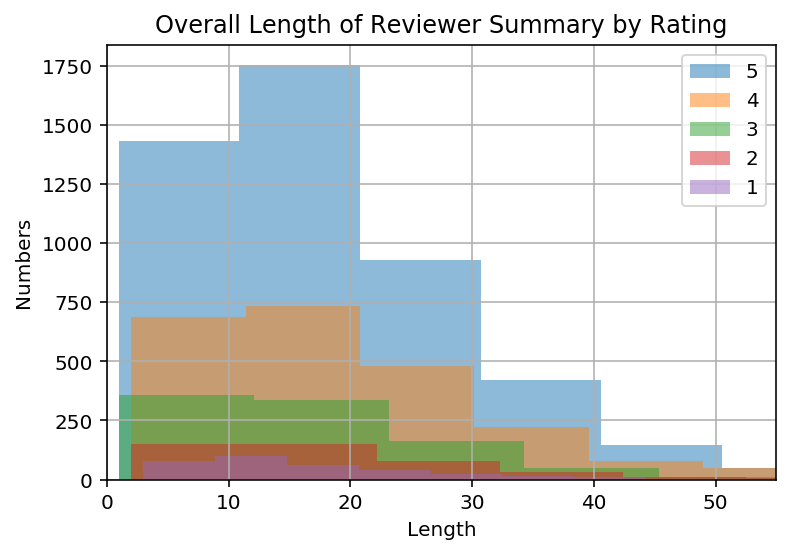

In [18]:
plt.hist(sum_rating5_len, alpha = 0.5, label='5')
plt.hist(sum_rating4_len, alpha = 0.5, label='4')
plt.hist(sum_rating3_len, alpha = 0.5, label='3')
plt.hist(sum_rating2_len, alpha = 0.5, label='2')
plt.hist(sum_rating1_len, alpha = 0.5, label='1')
plt.title('Overall Length of Reviewer Summary by Rating')
plt.xlabel('Length')
plt.ylabel('Numbers')
plt.legend(loc='upper right')
plt.xlim(0,55)
plt.grid()
plt.show();

<a id='Top Least Occuring Words in Text and Summary ngram 1 ~ 3'></a>
# Top Least Occuring Words in Text and Summary ngram 1 ~ 3
By using CountVectorizer, which simply counts how many times the unique word shows up in the dataset, overall top least occurring words in text and summary reviews does not show any interesting findings or generate any values for statistical inference. However, as n-gram range increases, words "point, people, paced, and page" shows up and it is easier to understand the outputs since it forms a sentence.

In [19]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(1,1))
cv.fit(amazon['review_text'])
cv_bigrams = cv.transform(amazon['review_text'])

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('review_text', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=True).head(10)).reset_index()
cv_top_dem

,review_text,count
0,00,1
1,mitrokhin2,1
2,mitrokhins,1
3,mitt,1
4,mittenburg,1
5,mittens,1
6,mitts,1
7,mitzi,1
8,mixedup,1
9,mixeswhile,1


In [20]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(2,2))
cv.fit(amazon['review_text'])
cv_bigrams = cv.transform(amazon['review_text'])

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('review_text', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=True).head(10)).reset_index()
cv_top_dem

,review_text,count
0,00 farina,1
1,peopleat fascinating,1
2,peopleaside overused,1
3,peopleas story,1
4,peopleas actual,1
5,people34 mentality,1
6,people34 martin,1
7,people34 dumb,1
8,people34 could,1
9,people zombies,1


In [21]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(3,3))
cv.fit(amazon['review_text'])
cv_bigrams = cv.transform(amazon['review_text'])

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('review_text', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=True).head(10)).reset_index()
cv_top_dem

,review_text,count
0,00 farina flour,1
1,point view well,1
2,point view world,1
3,point view worthwhile,1
4,point view5 question,1
5,point viewand please,1
6,point viewcommentators political,1
7,point view various,1
8,point viewi would,1
9,point views concerning,1


In [22]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(1,1))
cv.fit(amazon['review_summary'])
cv_bigrams = cv.transform(amazon['review_summary'])

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('review_summary', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=True).head(10)).reset_index()
cv_top_dem

,review_summary,count
0,lara,1
1,nazism,1
2,nazi,1
3,nazarea,1
4,navarro,1
5,naughty,1
6,nativity,1
7,native,1
8,neal,1
9,nate,1


In [23]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(2,2))
cv.fit(amazon['review_summary'])
cv_bigrams = cv.transform(amazon['review_summary'])

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('review_summary', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=True).head(10)).reset_index()
cv_top_dem

,review_summary,count
0,10 best,1
1,pace star,1
2,paced adventure,1
3,paced brutal,1
4,paced historical,1
5,paced romance,1
6,paced suspenseful,1
7,paced thrill,1
8,paced unique,1
9,pacedkept attention,1


In [24]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(3,3))
cv.fit(amazon['review_summary'])
cv_bigrams = cv.transform(amazon['review_summary'])

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('review_summary', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=True).head(10)).reset_index()
cv_top_dem

,review_summary,count
0,10 best novels,1
1,pageturner sad sad,1
2,pages turning rapid,1
3,pages keep comming,1
4,page turner memoir,1
5,page bronies rule,1
6,page amazonspecifichtml codes,1
7,paen 80s nerd,1
8,padding short story,1
9,packed well ordered,1


<a id='Top Most Occuring Words'></a>
# Top Most Occuring Words
By filtering the top most frequently occurring words using word clouds and CountVectorizer, overall words are positive such as good, great, love, love, life, excellent, beautiful, wonderful, fantastic, fun, and etc.  In addition, as n-gram increases, it reveals the customer's sentiments such as can't wait, well written, highly recommend, great story, can't wait next, would recommend anyone, love love love, don't waste time, and etc.

<a id='Overall Most Frequent Words in Review Text and Summary Using Word Clouds'></a>
### Overall Most Frequent Words in Review Text and Summary Using Word Clouds

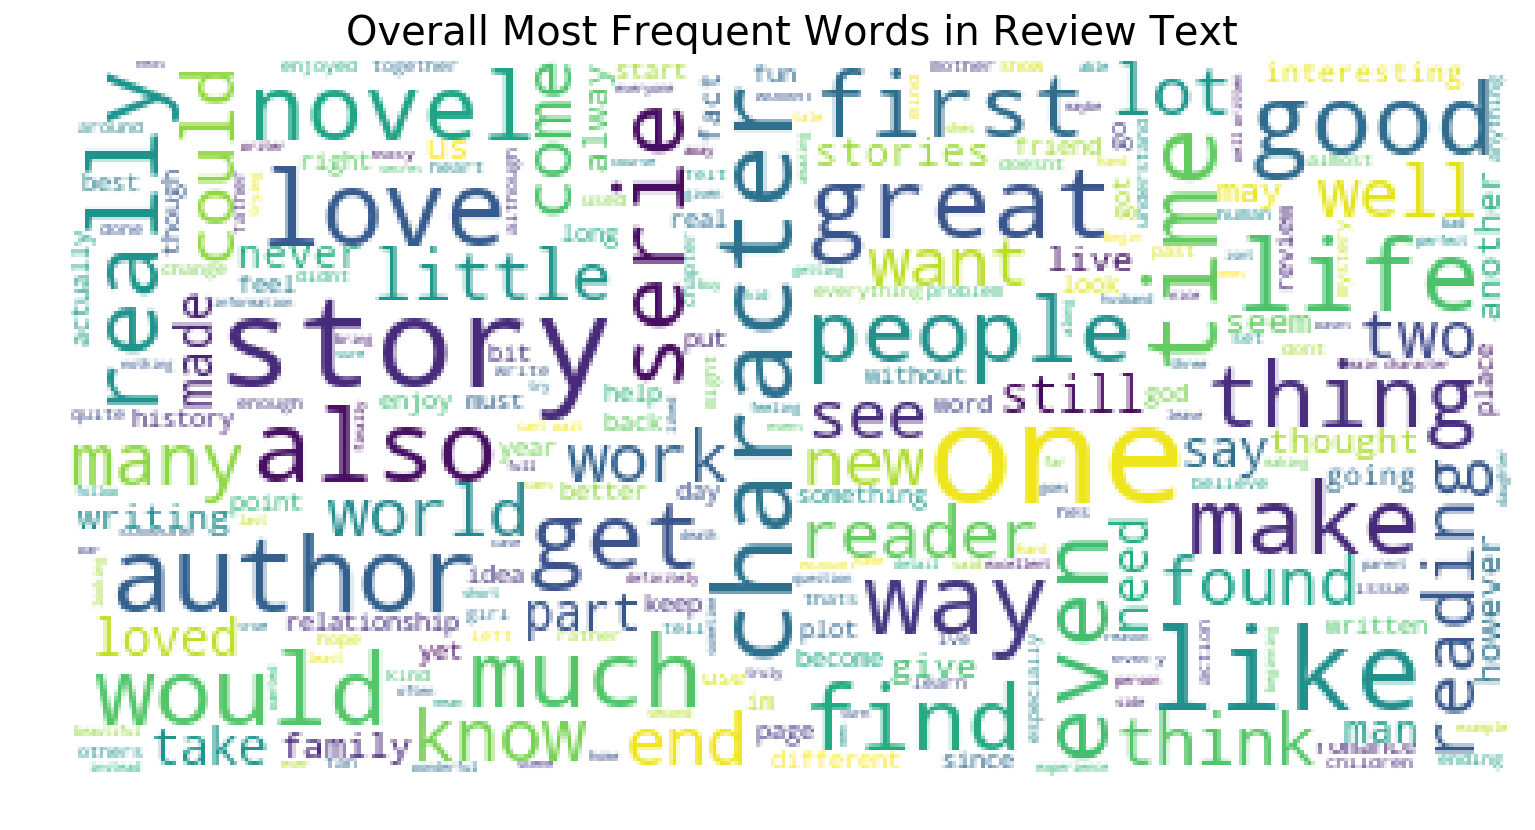

In [25]:
plt.figure(figsize=(13,10))
word_string=" ".join(amazon['review_text'].str.lower())
wordcloud = WordCloud(stopwords='english',
                      background_color='white', 
                      max_words=1000,
                      max_font_size= 40).generate(word_string)
plt.clf()
plt.title("Overall Most Frequent Words in Review Text", fontsize=20)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

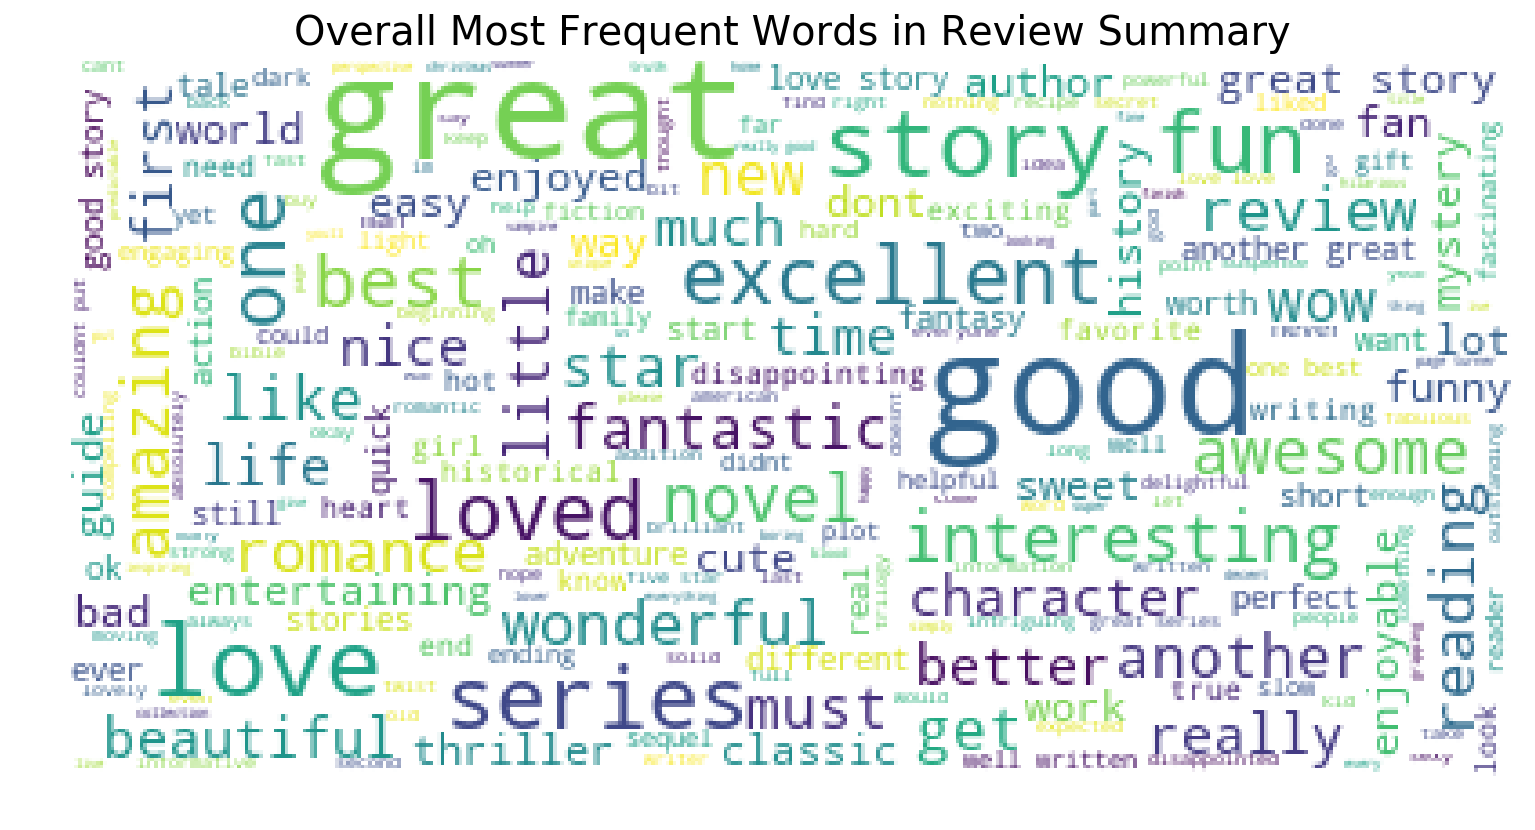

In [26]:
plt.figure(figsize=(13,10))
word_string=" ".join(amazon['review_summary'].str.lower())
wordcloud = WordCloud(stopwords='english',
                      background_color='white', 
                      max_words=1000,
                      max_font_size= 40).generate(word_string)
plt.clf()
plt.title("Overall Most Frequent Words in Review Summary", fontsize=20)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

<a id='Top Most Frequent Occurring Words ngram-range 1'></a>
### Top Most Frequent Occurring Words ngram-range 1

In [27]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(1,1))
cv.fit(amazon['review_text'])
cv_bigrams = cv.transform(amazon['review_text'])

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('review_text', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=False).head(10)).reset_index()
cv_top_dem

,review_text,count
0,one,5175
1,story,5052
2,like,3799
3,would,3174
4,love,2920
5,good,2865
6,characters,2699
7,really,2698
8,great,2492
9,time,2379


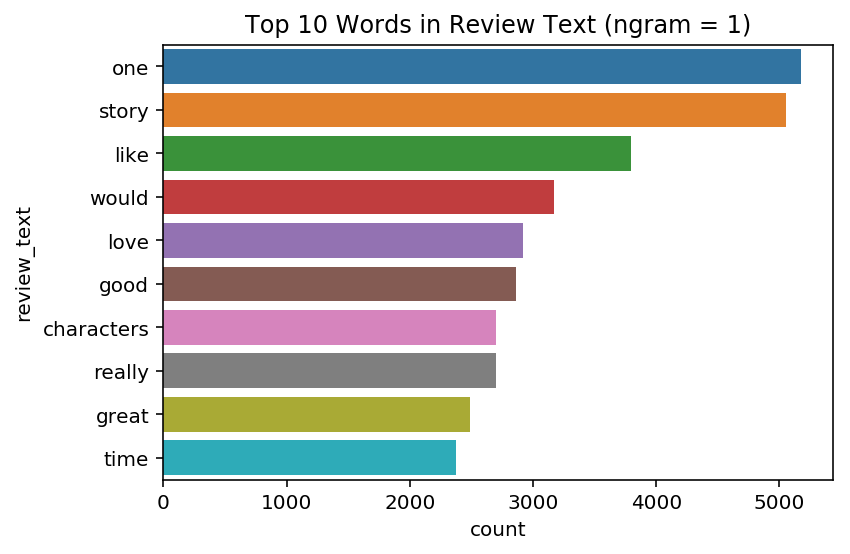

In [28]:
# Plot the result
ax = plt.axes()
sns.barplot(x="count", y="review_text", data=cv_top_dem)
ax.set_title('Top 10 Words in Review Text (ngram = 1)')
plt.show();

In [29]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(1,1))
cv.fit(amazon['review_summary'])
cv_bigrams = cv.transform(amazon['review_summary'])

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('review_summary', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=False).head(10)).reset_index()
cv_top_dem

,review_summary,count
0,great,773
1,good,638
2,story,418
3,love,314
4,series,218
5,one,195
6,best,185
7,fun,173
8,loved,164
9,excellent,163


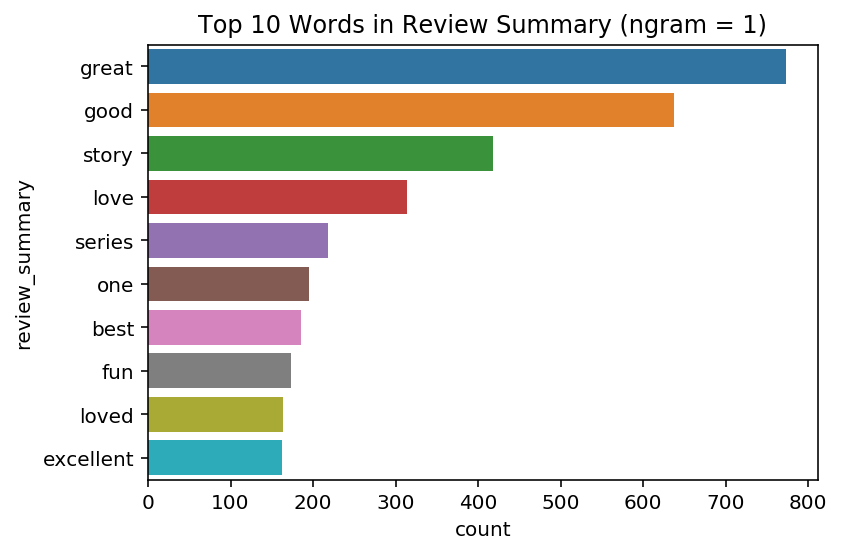

In [30]:
ax = plt.axes()
sns.barplot(x="count", y="review_summary", data=cv_top_dem)
ax.set_title('Top 10 Words in Review Summary (ngram = 1)')
plt.show();

<a id='Top Most Frequent Occurring Words ngram-range 2'></a>
### Top Most Frequent Occurring Words ngram-range 2

In [31]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(2,2))
cv.fit(amazon['review_text'])
cv_bigrams = cv.transform(amazon['review_text'])

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('review_text', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=False).head(10)).reset_index()
cv_top_dem

,review_text,count
0,cant wait,370
1,well written,362
2,highly recommend,298
3,even though,250
4,really enjoyed,229
5,would recommend,212
6,main character,197
7,looking forward,193
8,love story,177
9,story line,172


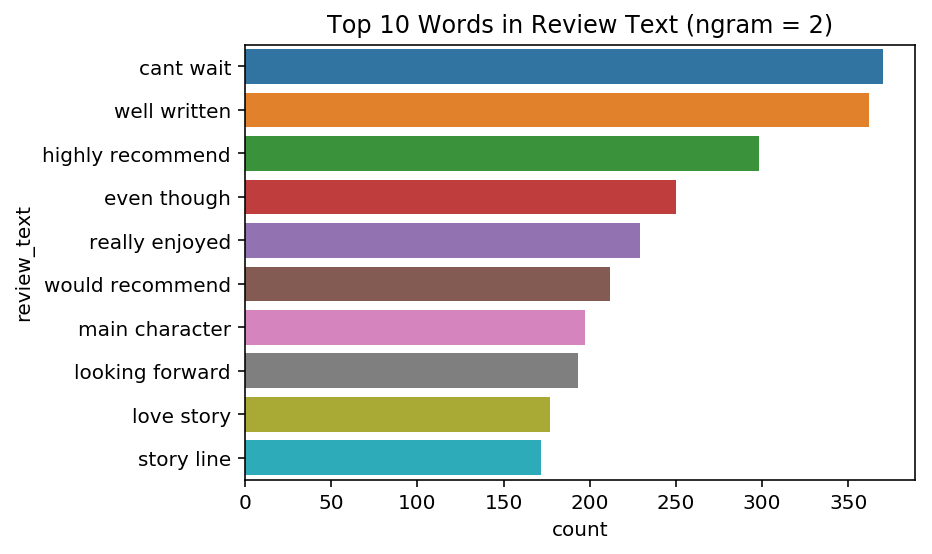

In [32]:
# Plot the result
ax = plt.axes()
sns.barplot(x="count", y="review_text", data=cv_top_dem)
ax.set_title('Top 10 Words in Review Text (ngram = 2)')
plt.show();

In [33]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(2,2))
cv.fit(amazon['review_summary'])
cv_bigrams = cv.transform(amazon['review_summary'])

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('review_summary', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=False).head(10)).reset_index()
cv_top_dem

,review_summary,count
0,great story,56
1,another great,45
2,love story,40
3,good story,40
4,well written,32
5,one best,31
6,couldnt put,27
7,great series,27
8,five stars,22
9,page turner,19


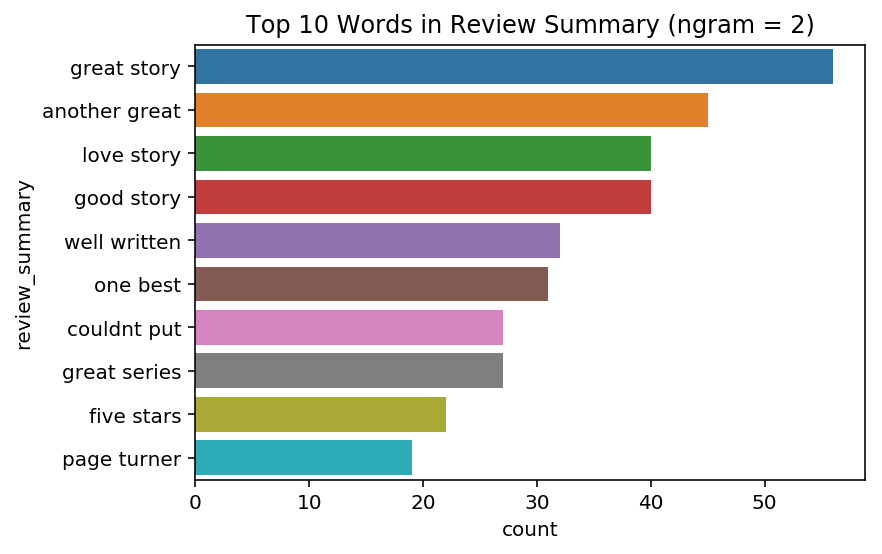

In [34]:
ax = plt.axes()
sns.barplot(x="count", y="review_summary", data=cv_top_dem)
ax.set_title('Top 10 Words in Review Summary (ngram = 2)')
plt.show();

<a id='Top Most Frequent Occurring Words ngram-range 3'></a>
### Most Frequent Occurring Words ngram-range 3

In [35]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(3,3))
cv.fit(amazon['review_text'])
cv_bigrams = cv.transform(amazon['review_text'])

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('review_text', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=False).head(10)).reset_index()
cv_top_dem

,review_text,count
0,cant wait next,109
1,would recommend anyone,54
2,look forward reading,54
3,cant wait see,52
4,exchange honest review,51
5,looking forward reading,46
6,wait next one,41
7,cobra cobra cobra,40
8,world war ii,36
9,highly recommend anyone,34


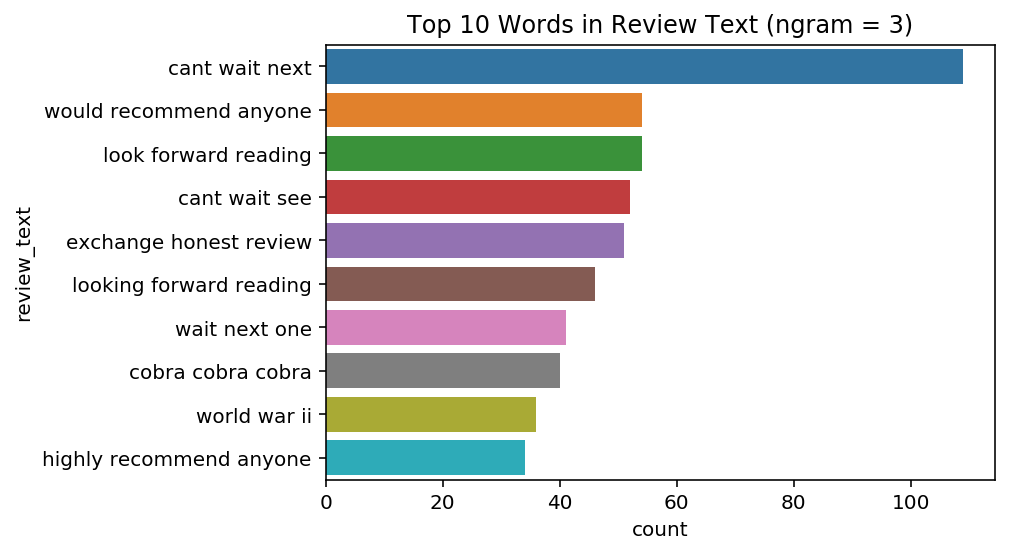

In [36]:
# Plot the result
ax = plt.axes()
sns.barplot(x="count", y="review_text", data=cv_top_dem)
ax.set_title('Top 10 Words in Review Text (ngram = 3)')
plt.show();

In [37]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(3,3))
cv.fit(amazon['review_summary'])
cv_bigrams = cv.transform(amazon['review_summary'])

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('review_summary', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=False).head(10)).reset_index()
cv_top_dem

,review_summary,count
0,keeps getting better,8
1,love love love,8
2,cant wait next,8
3,start new series,5
4,another great story,5
5,good story line,4
6,gets better better,4
7,loved loved loved,4
8,real page turner,4
9,wow wow wow,4


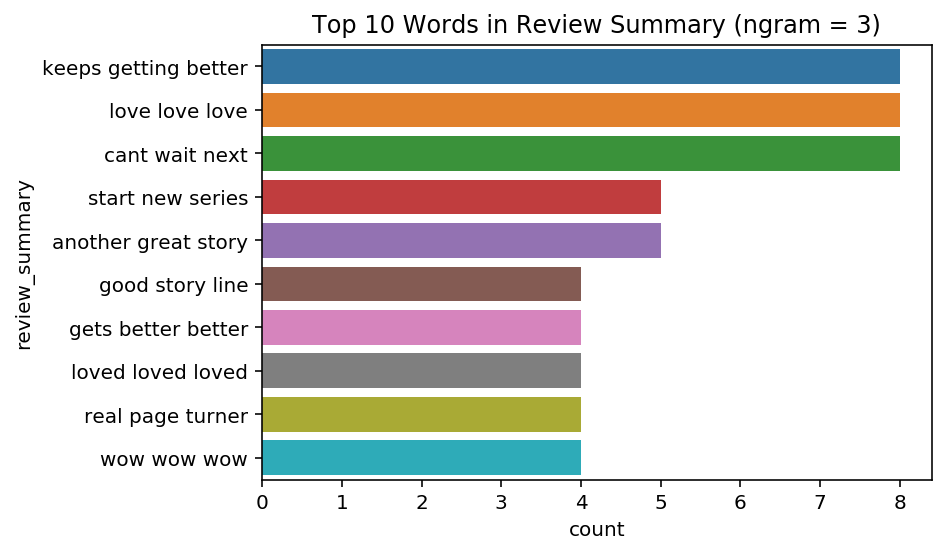

In [38]:
ax = plt.axes()
sns.barplot(x="count", y="review_summary", data=cv_top_dem)
ax.set_title('Top 10 Words in Review Summary (ngram = 3)')
plt.show();

<a id='Most Frequent Words in Text by High Rating vs Low Rating'></a>
## Most Frequent Words in Text by High Rating vs Low Rating
Instead of filtering all words based on each rating, by only extracting the words highest rating 5 and lowest rating 1, rating 5 shows the similar results as the overall top most frequent words. However, rating 1 shows negative words and customers sentiments such as nothing, boring, don't, waste, bad, waste time, don't even, dumb dumb, garbage garbage, don't waste time, proof im bitch, probably hate hate, and etc. This is sort of obvious since as rating decreases customers are most likely disappointed with the products.

<a id='Review Text High Rating ngram 1 ~ 3'></a>
### Review Text High Rating ngram 1 ~ 3

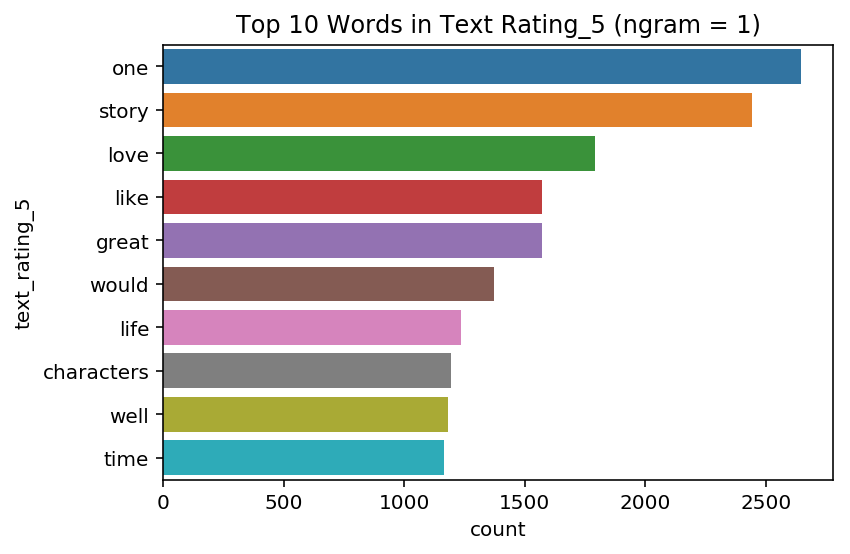

In [39]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(1,1))
cv.fit(text_rating_5)
cv_bigrams = cv.transform(text_rating_5)

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('text_rating_5', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=False).head(10)).reset_index()
cv_top_dem

# Plot the result
ax = plt.axes()
sns.barplot(x="count", y="text_rating_5", data=cv_top_dem)
ax.set_title('Top 10 Words in Text Rating_5 (ngram = 1)')
plt.show();

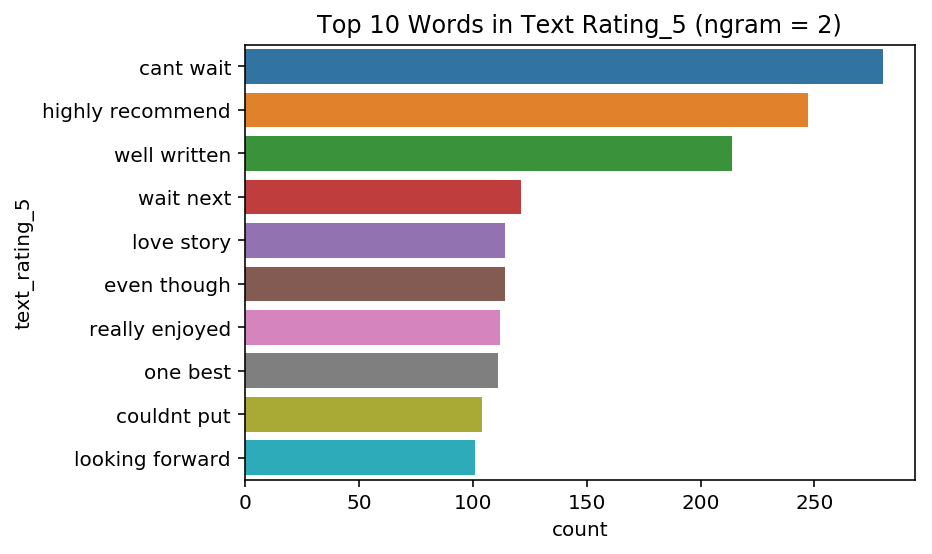

In [40]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(2,2))
cv.fit(text_rating_5)
cv_bigrams = cv.transform(text_rating_5)

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('text_rating_5', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=False).head(10)).reset_index()
cv_top_dem

# Plot the result
ax = plt.axes()
sns.barplot(x="count", y="text_rating_5", data=cv_top_dem)
ax.set_title('Top 10 Words in Text Rating_5 (ngram = 2)')
plt.show();

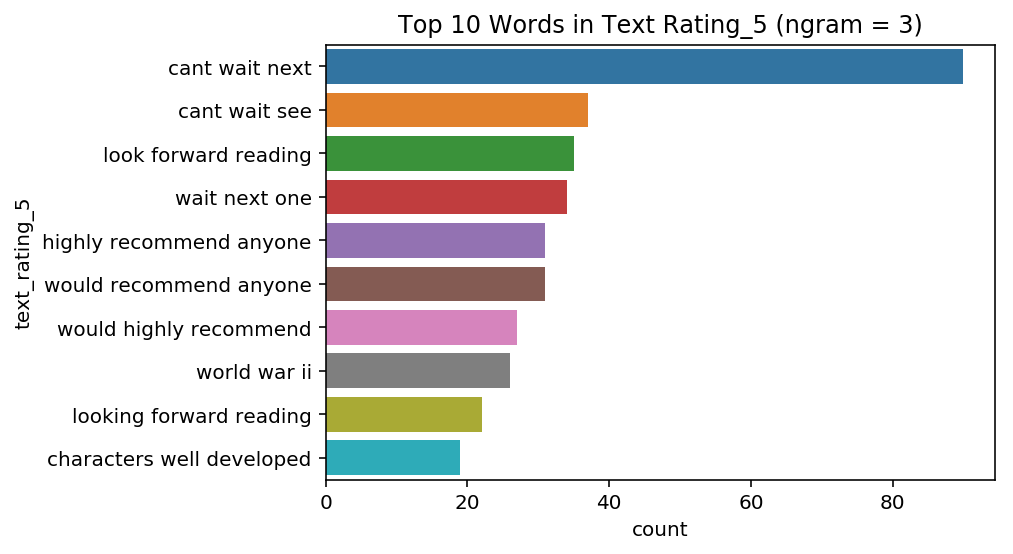

In [41]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(3,3))
cv.fit(text_rating_5)
cv_bigrams = cv.transform(text_rating_5)

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('text_rating_5', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=False).head(10)).reset_index()
cv_top_dem

# Plot the result
ax = plt.axes()
sns.barplot(x="count", y="text_rating_5", data=cv_top_dem)
ax.set_title('Top 10 Words in Text Rating_5 (ngram = 3)')
plt.show();

<a id='Review Text Low Rating ngram 1 ~ 3'></a>
### Review Text Low Rating ngram 1 ~ 3

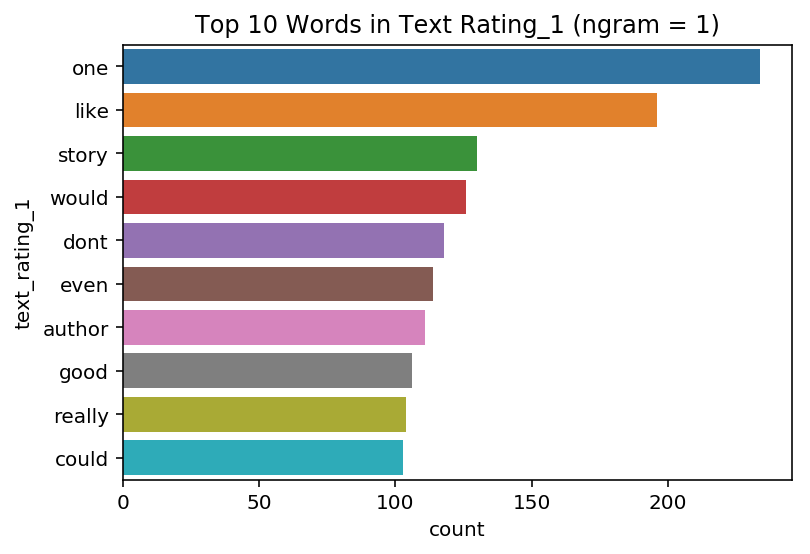

In [42]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(1,1))
cv.fit(text_rating_1)
cv_bigrams = cv.transform(text_rating_1)

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('text_rating_1', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=False).head(10)).reset_index()
cv_top_dem

# Plot the result
ax = plt.axes()
sns.barplot(x="count", y="text_rating_1", data=cv_top_dem)
ax.set_title('Top 10 Words in Text Rating_1 (ngram = 1)')
plt.show();

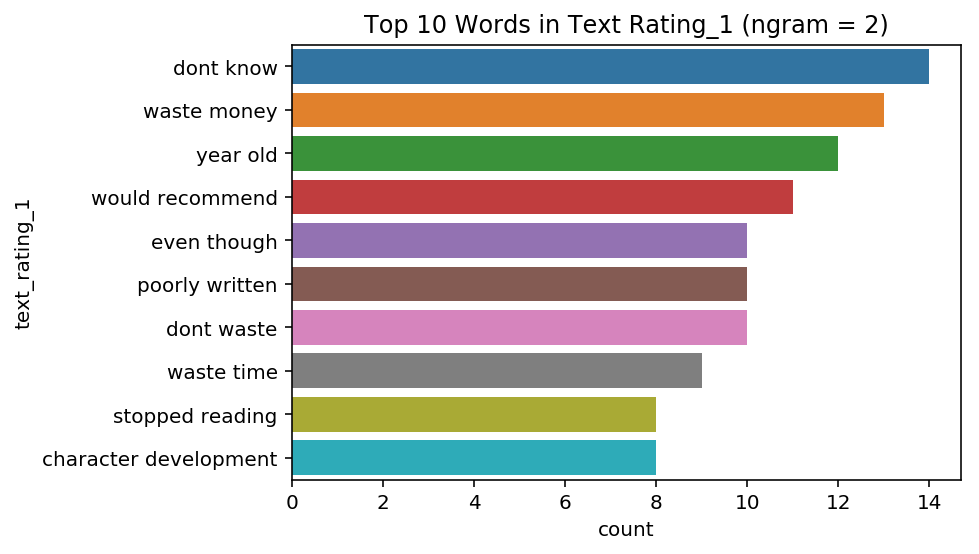

In [43]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(2,2))
cv.fit(text_rating_1)
cv_bigrams = cv.transform(text_rating_1)

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('text_rating_1', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=False).head(10)).reset_index()
cv_top_dem

# Plot the result
ax = plt.axes()
sns.barplot(x="count", y="text_rating_1", data=cv_top_dem)
ax.set_title('Top 10 Words in Text Rating_1 (ngram = 2)')
plt.show();

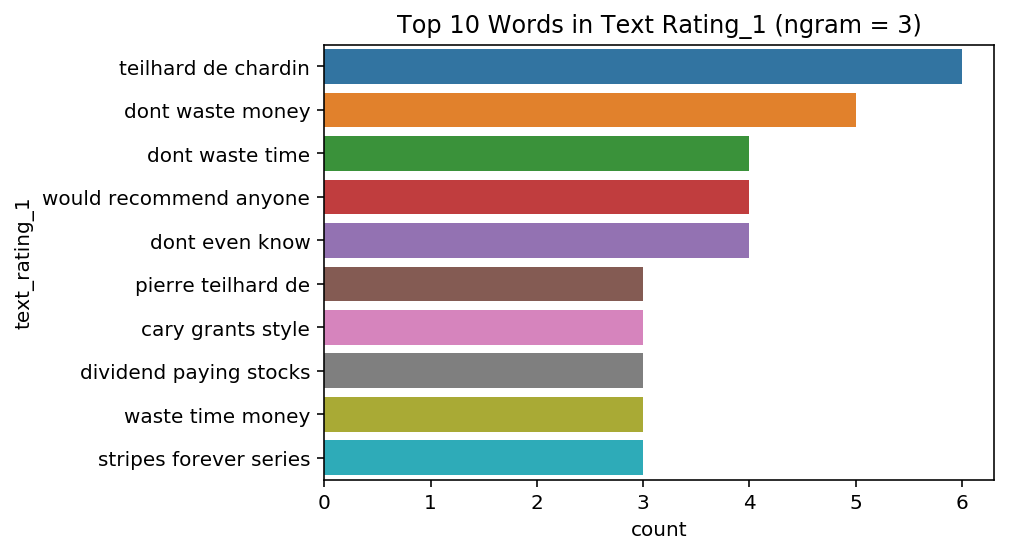

In [44]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(3,3))
cv.fit(text_rating_1)
cv_bigrams = cv.transform(text_rating_1)

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('text_rating_1', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=False).head(10)).reset_index()
cv_top_dem

# Plot the result
ax = plt.axes()
sns.barplot(x="count", y="text_rating_1", data=cv_top_dem)
ax.set_title('Top 10 Words in Text Rating_1 (ngram = 3)')
plt.show();

<a id='Review Summary High Rating ngram 1 ~ 3'></a>
### Review Summary High Rating ngram 1 ~ 3

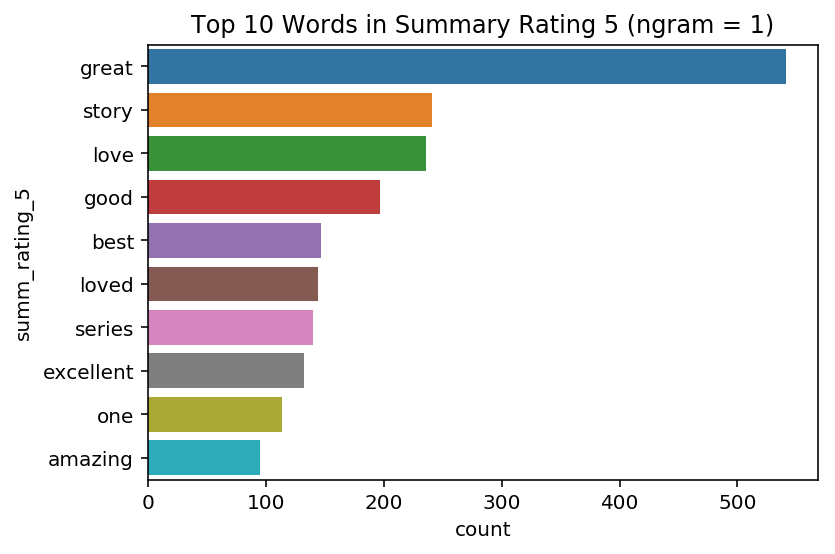

In [45]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(1,1))
cv.fit(summ_rating_5)
cv_bigrams = cv.transform(summ_rating_5)

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('summ_rating_5', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=False).head(10)).reset_index()
cv_top_dem

# Plot the result
ax = plt.axes()
sns.barplot(x="count", y="summ_rating_5", data=cv_top_dem)
ax.set_title('Top 10 Words in Summary Rating 5 (ngram = 1)')
plt.show();

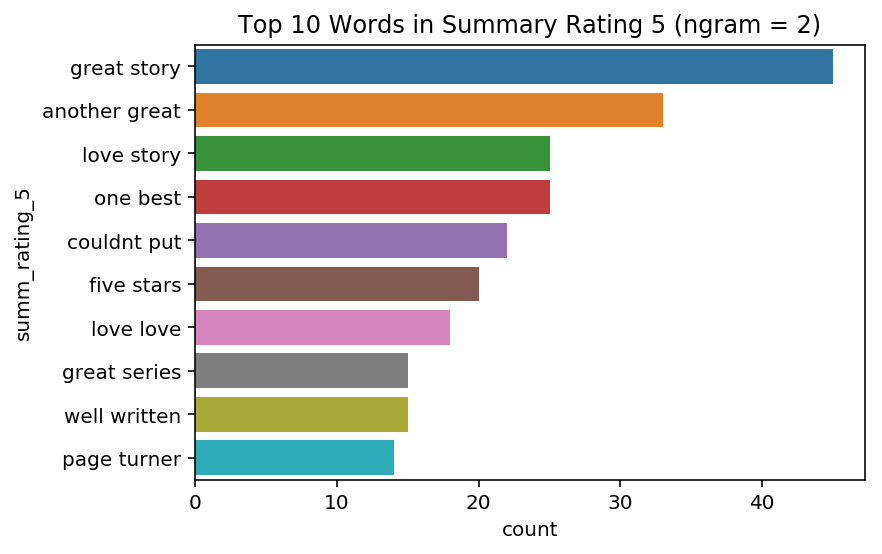

In [46]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(2,2))
cv.fit(summ_rating_5)
cv_bigrams = cv.transform(summ_rating_5)

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('summ_rating_5', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=False).head(10)).reset_index()
cv_top_dem

# Plot the result
ax = plt.axes()
sns.barplot(x="count", y="summ_rating_5", data=cv_top_dem)
ax.set_title('Top 10 Words in Summary Rating 5 (ngram = 2)')
plt.show();

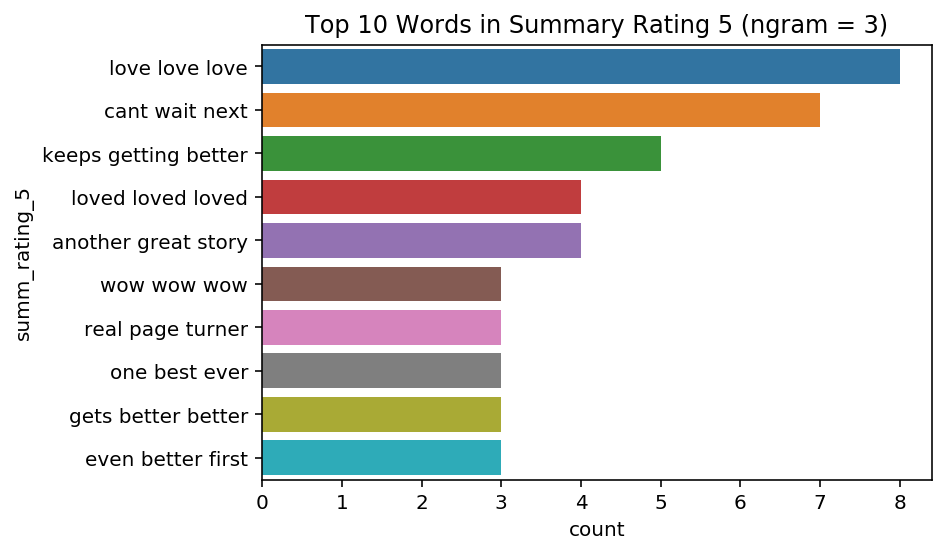

In [47]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(3,3))
cv.fit(summ_rating_5)
cv_bigrams = cv.transform(summ_rating_5)

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('summ_rating_5', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=False).head(10)).reset_index()
cv_top_dem

# Plot the result
ax = plt.axes()
sns.barplot(x="count", y="summ_rating_5", data=cv_top_dem)
ax.set_title('Top 10 Words in Summary Rating 5 (ngram = 3)')
plt.show();

<a id='Review Summary Low Rating ngram 1 ~ 3'></a>
### Review Summary Low Rating ngram 1 ~ 3

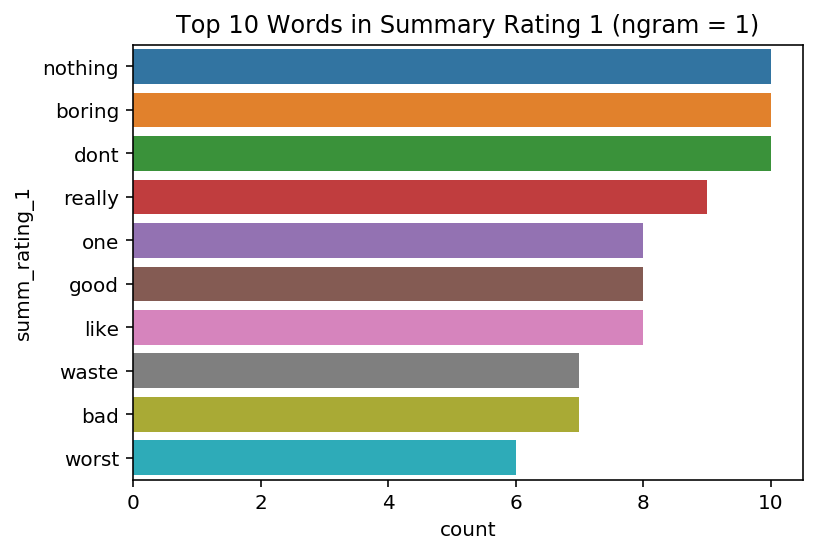

In [48]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(1,1))
cv.fit(summ_rating_1)
cv_bigrams = cv.transform(summ_rating_1)

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('summ_rating_1', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=False).head(10)).reset_index()
cv_top_dem

# Plot the result
ax = plt.axes()
sns.barplot(x="count", y="summ_rating_1", data=cv_top_dem)
ax.set_title('Top 10 Words in Summary Rating 1 (ngram = 1)')
plt.show();

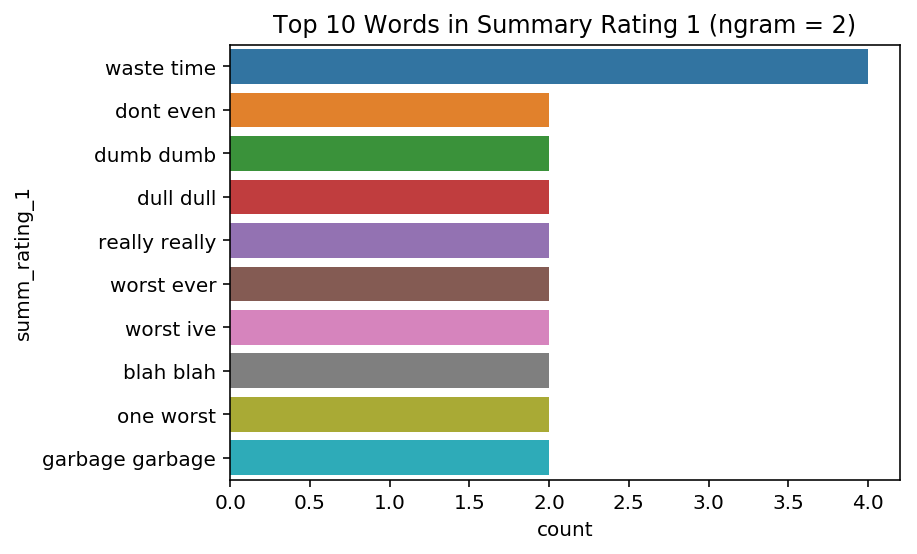

In [49]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(2,2))
cv.fit(summ_rating_1)
cv_bigrams = cv.transform(summ_rating_1)

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('summ_rating_1', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=False).head(10)).reset_index()
cv_top_dem

# Plot the result
ax = plt.axes()
sns.barplot(x="count", y="summ_rating_1", data=cv_top_dem)
ax.set_title('Top 10 Words in Summary Rating 1 (ngram = 2)')
plt.show();

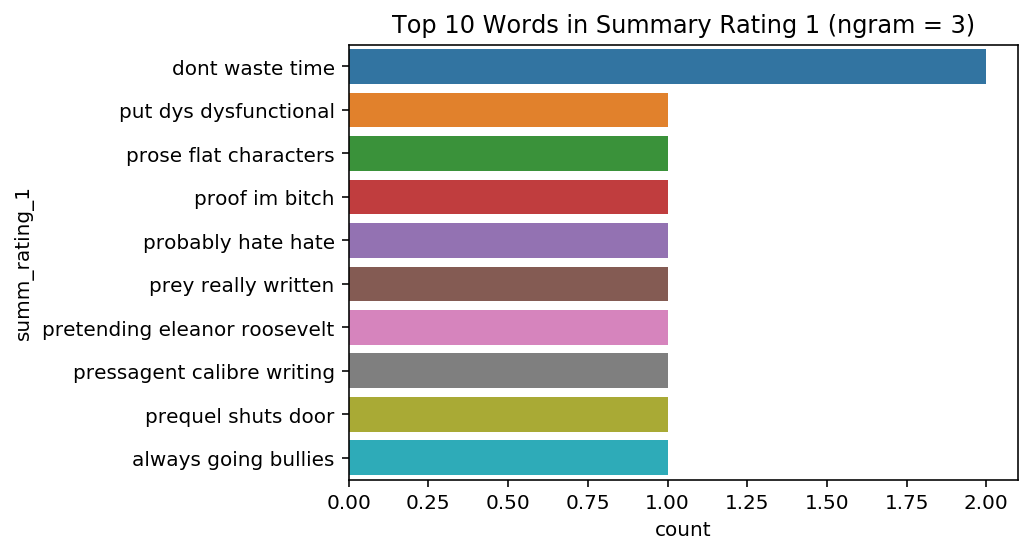

In [50]:
# fitting and transforming CV on democratic tweets
cv = CountVectorizer(strip_accents='unicode', ngram_range=(3,3))
cv.fit(summ_rating_1)
cv_bigrams = cv.transform(summ_rating_1)

# Creating a dataframe containing bigram frequency
frequencies = sum(cv_bigrams).toarray()[0]
cv_bigram_df = pd.DataFrame(frequencies, index=cv.get_feature_names(), 
                             columns=['count'])

cv_bigram_df.index.rename('summ_rating_1', inplace=True)
cv_top_dem = pd.DataFrame(cv_bigram_df.sort_values('count', ascending=False).head(10)).reset_index()
cv_top_dem

# Plot the result
ax = plt.axes()
sns.barplot(x="count", y="summ_rating_1", data=cv_top_dem)
ax.set_title('Top 10 Words in Summary Rating 1 (ngram = 3)')
plt.show();

<a id='Sentiment Analysis By Using TextBlob'></a>
# Sentiment Analysis By Using TextBlob
By using the library TextBlob with text data, it can generate a tuple that contains polarity level that ranges from -1 to 1 (negative and positive sentiment) and subjectivity level range from 0 to 1 (objectivity and subjectivity). 

In [51]:
amazon.head()

,review_date,reviewer_id,reviewer_name,book_category,review_text,review_summary,rating,helpful_review
0,2006-01-18,A3SHA4Y9DHEK39,Chad Oberholtzer,Christian Books & Bibles,live church culture holiness rarely mentioned ...,great one,5,0
1,2008-03-16,A11M98R135HMSY,Paul Skinner,"Mystery, Thriller & Suspense",philip craigs finally got around first j w jac...,begining beautiful relationship,5,1
2,2013-02-26,AD20B29YQDZYQ,Amazon Customer,Literature & Fiction,storyline good reason finished filled way much...,ok,2,1
3,2013-07-16,AZR6CYHTQ9TL,Inez,Science Fiction & Fantasy,love apocalypse stories one really creeped lik...,oh bugs everywhere,5,1
4,2013-04-14,A14BTJRH9VNLJJ,Kurt A. Johnson,Biographies & Memoirs,sociopath sociopath person little conscience p...,interesting thought provoking,4,1


In [52]:
# Function that process the sentiment analysis by using Textblob
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [53]:
# Apply the function to get sentiment analysis on columns review summary and text
summary_sentiment = amazon['review_summary'].apply(sentiment_calc)
text_sentiment = amazon['review_text'].apply(sentiment_calc)

In [54]:
# Store each results into seperate lists from tuples
summary_polarity = []
for i in summary_sentiment:
    try:
        summary_polarity.append(i[0])
    except:
        summary_polarity.append(0)

summary_subjectivity = []
for i in summary_sentiment:
    try:
        summary_subjectivity.append(i[1])
    except:
        summary_subjectivity.append(0)

text_polarity = []
for i in text_sentiment:
    try:
        text_polarity.append(i[0])
    except:
        text_polarity.append(0)

text_subjectivity = []
for i in text_sentiment:
    try:
        text_subjectivity.append(i[1])
    except:
        text_subjectivity.append(0)

In [55]:
# Create a seperate columns to store each sentiment and subjectivity results
amazon['summary_pol'] = summary_polarity
amazon['summary_subj'] = summary_subjectivity
amazon['text_pol'] = text_polarity
amazon['text_subj'] = text_subjectivity

In [56]:
# Round the scores 
cols_to_round = ['summary_pol', 'summary_subj',
                 'text_pol', 'text_subj']
for i in cols_to_round:
    amazon[i] = round(amazon[i], 1)

In [57]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8757 entries, 0 to 8811
Data columns (total 12 columns):
review_date       8757 non-null object
reviewer_id       8757 non-null object
reviewer_name     8757 non-null object
book_category     8757 non-null object
review_text       8757 non-null object
review_summary    8757 non-null object
rating            8757 non-null int64
helpful_review    8757 non-null int64
summary_pol       8757 non-null float64
summary_subj      8757 non-null float64
text_pol          8757 non-null float64
text_subj         8757 non-null float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.2+ MB


In [58]:
amazon.head()

,review_date,reviewer_id,reviewer_name,book_category,review_text,review_summary,rating,helpful_review,summary_pol,summary_subj,text_pol,text_subj
0,2006-01-18,A3SHA4Y9DHEK39,Chad Oberholtzer,Christian Books & Bibles,live church culture holiness rarely mentioned ...,great one,5,0,0.8,0.8,0.3,0.5
1,2008-03-16,A11M98R135HMSY,Paul Skinner,"Mystery, Thriller & Suspense",philip craigs finally got around first j w jac...,begining beautiful relationship,5,1,0.8,1.0,0.2,0.5
2,2013-02-26,AD20B29YQDZYQ,Amazon Customer,Literature & Fiction,storyline good reason finished filled way much...,ok,2,1,0.5,0.5,0.1,0.5
3,2013-07-16,AZR6CYHTQ9TL,Inez,Science Fiction & Fantasy,love apocalypse stories one really creeped lik...,oh bugs everywhere,5,1,0.0,0.0,0.4,0.4
4,2013-04-14,A14BTJRH9VNLJJ,Kurt A. Johnson,Biographies & Memoirs,sociopath sociopath person little conscience p...,interesting thought provoking,4,1,0.5,0.5,0.1,0.5


<a id='Amazon Book Reviews Sentiment and Subjectivity Distribution'></a>
### Amazon Book Reviews Sentiment and Subjectivity Distribution
The overall distributions of reviewers polarity level have more positive sentiments over than negative sentiments. On the other hand, text review subjectivity level shows bell curve and positive skew for review summary.

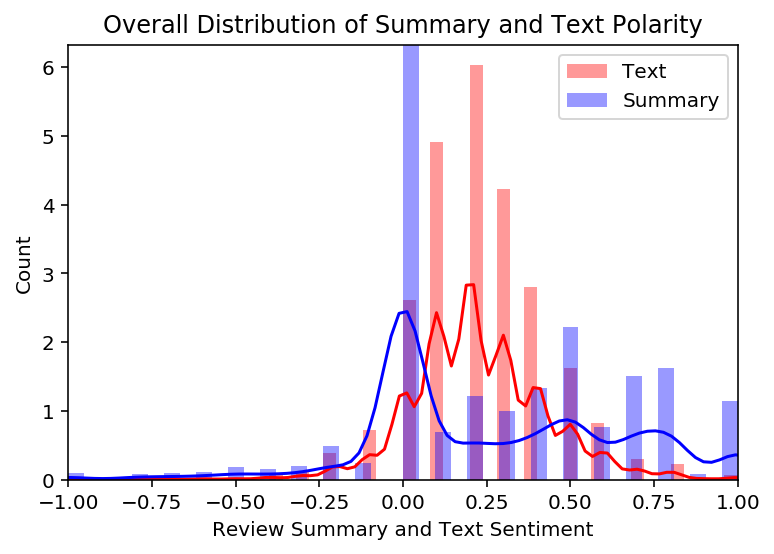

In [59]:
# Plot distribution of the sentiments
sns.distplot(amazon['text_pol'], color="red", label="Text")
sns.distplot(amazon['summary_pol'], color="blue", label="Summary")
plt.title("Overall Distribution of Summary and Text Polarity")
plt.xlabel("Review Summary and Text Sentiment")
plt.xlim(-1.0, 1.0)
plt.ylabel("Count")
plt.legend();

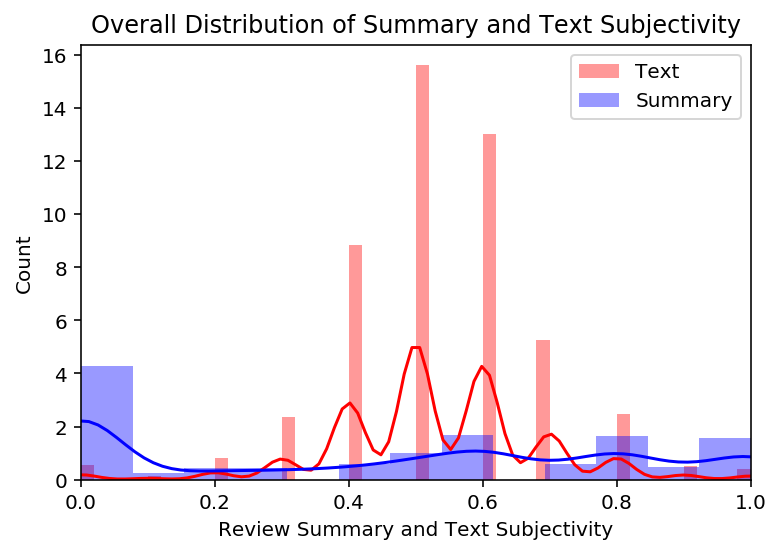

In [60]:
# Plot overall distribution of subjetivity
sns.distplot(amazon['text_subj'], color="red", label="Text")
sns.distplot(amazon['summary_subj'], color="blue", label="Summary")
plt.title("Overall Distribution of Summary and Text Subjectivity")
plt.xlabel("Review Summary and Text Subjectivity")
plt.xlim(0.0, 1.0)
plt.ylabel("Count")
plt.legend();

<a id='Amazon Book Reviews Sentiment and Subjectivity Distribution By Ratings'></a>
### Amazon Book Reviews Sentiment and Subjectivity Distribution By Ratings
Both reviews sentiment analysis shows as rating increases, sentiment and subjectivity level also increases. This could be due to customers are willing to write longer reviews as rating increases thus showing positive sentiments. In addition, detailed text review, sentiment drastically increases from 0 and declines steadily from 0.2 to 0.8 although showing generally a positive trend. On the other hand, most of the summary review sentiment shows neutral level (0).

The text review subjectivity shows a bell curve, normal distribution, which explains that the text reviews are not either based on or influenced by customers personal feelings, tastes, or opinions. It is a "correct"  or well-balanced review. On the other hand, summary review shows more objectivity than subjectivity level since summary reviews are much shorter than the text review. 

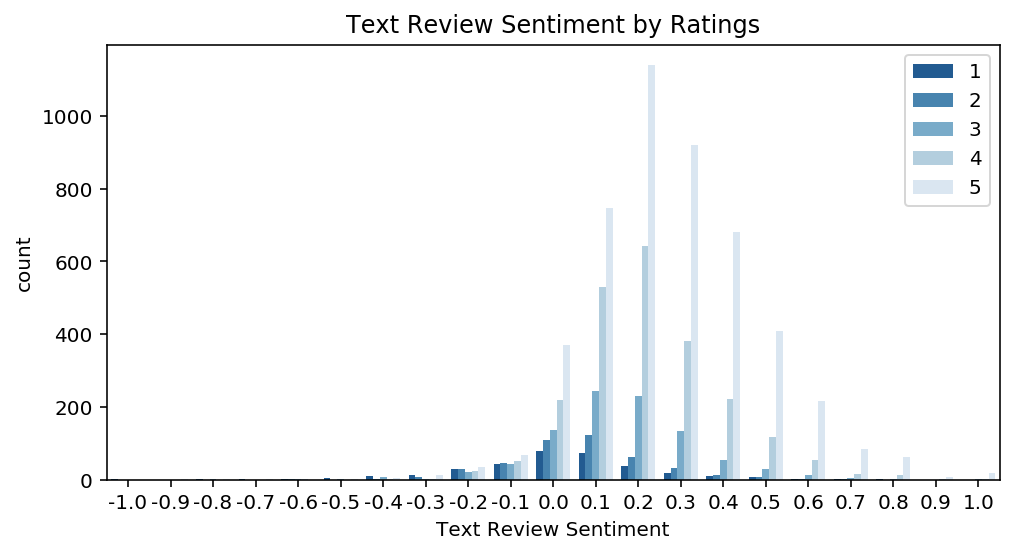

In [61]:
# Plot overall distributions of text review sentiments based on rating
plt.figure(figsize=(8,4))
sns.countplot(x="text_pol", hue='rating', data=amazon, palette="Blues_r")
plt.xlabel('Text Review Sentiment')
plt.title('Text Review Sentiment by Ratings')
plt.legend(loc='upper right')
plt.show();

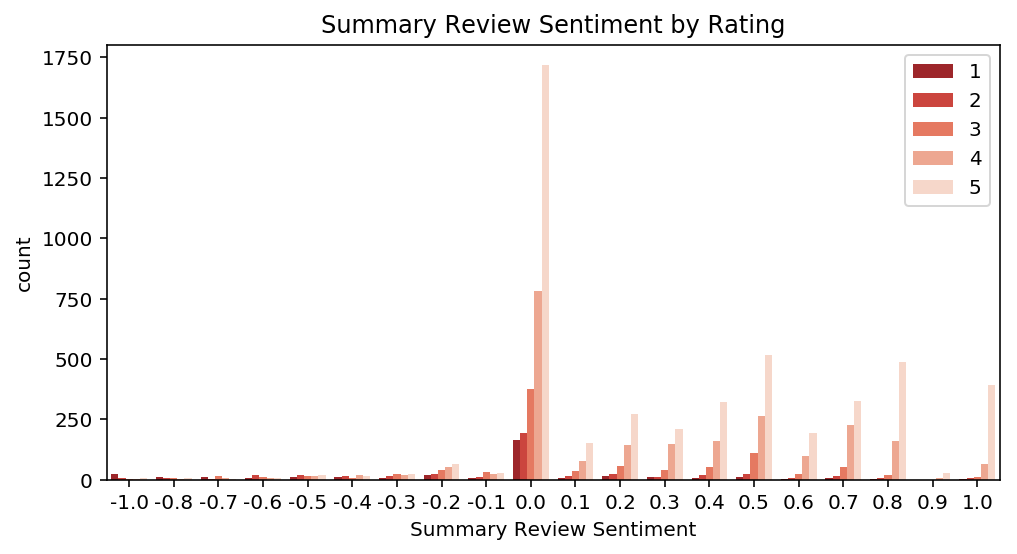

In [62]:
# Plot overall distributions of summary review sentiments based on rating
plt.figure(figsize=(8,4))
sns.countplot(x="summary_pol", hue='rating', data=amazon, palette="Reds_r")
plt.xlabel('Summary Review Sentiment')
plt.title('Summary Review Sentiment by Rating')
plt.legend(loc='upper right')
plt.show();

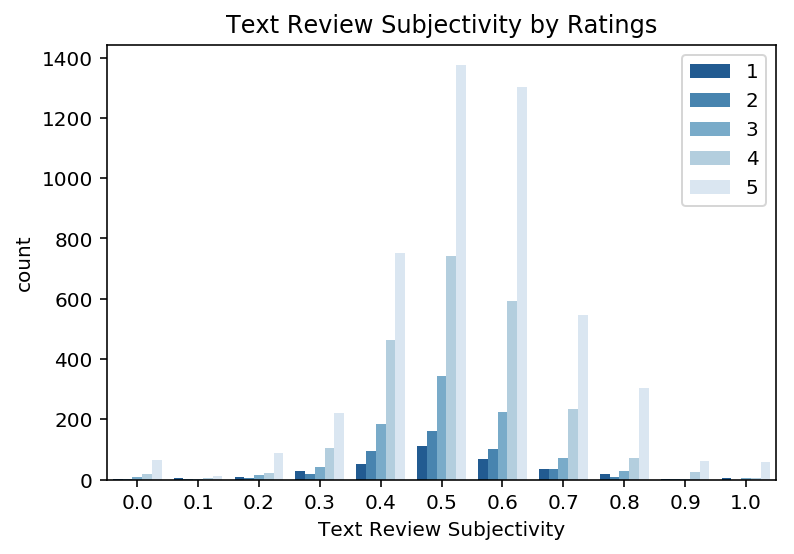

In [63]:
# Plot overall distributions of text review subjectivity by rating
sns.countplot(x="text_subj", hue='rating', data=amazon, palette="Blues_r")
plt.xlabel('Text Review Subjectivity')
plt.title('Text Review Subjectivity by Ratings')
plt.legend(loc='upper right')
plt.show();

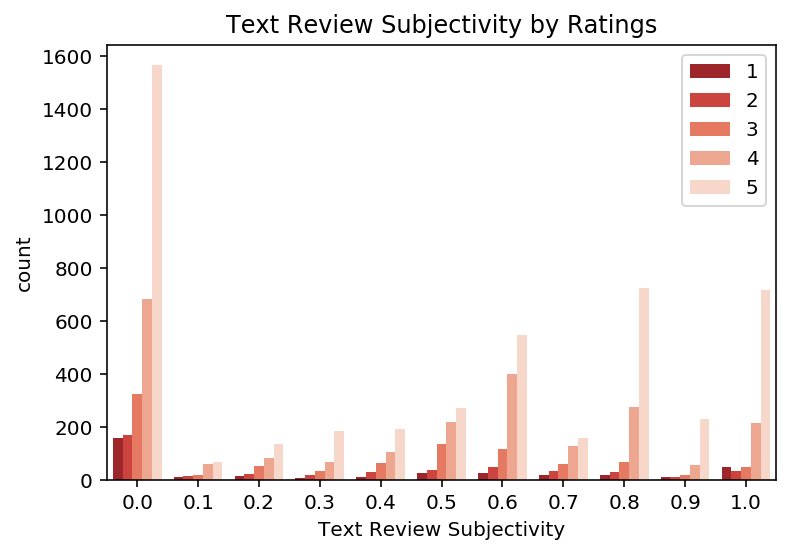

In [64]:
# Plot overall distributions of summary review subjectivity by rating
sns.countplot(x="summary_subj", hue='rating', data=amazon, palette="Reds_r")
plt.xlabel('Text Review Subjectivity')
plt.title('Text Review Subjectivity by Ratings')
plt.legend(loc='upper right')
plt.show();

<a id='Polarity and Subjectivity Level By Book Category'></a>
## Polarity and Subjectivity Level By Book Category
By filtering top book categories based on polarity and subjectivity level, book categories that are more factual base have the lowest polarity and subjectivity counts such as Toys & Games, Law, Medical Books, Engineering & Transportation, and Travel (ignore Books, Calendars, and Everything Else since it does not explain what type of book category it is). 

In [74]:
# Creat a sample dataframe
sample = pd.DataFrame()

In [100]:
# Copy and store book category, polarity and subjectivity columns
sample['book_category'] = amazon['book_category']
sample['text_pol'] = [1 if i >= 0 else 0 for i in amazon['text_pol']]
sample['summary_pol'] = [1 if i >= 0 else 0 for i in amazon['summary_pol']]
sample['text_subj'] = [1 if i >= 0.5 else 0 for i in amazon['text_subj']]
sample['summary_subj'] = [1 if i >= 0.5 else 0 for i in amazon['summary_subj']]

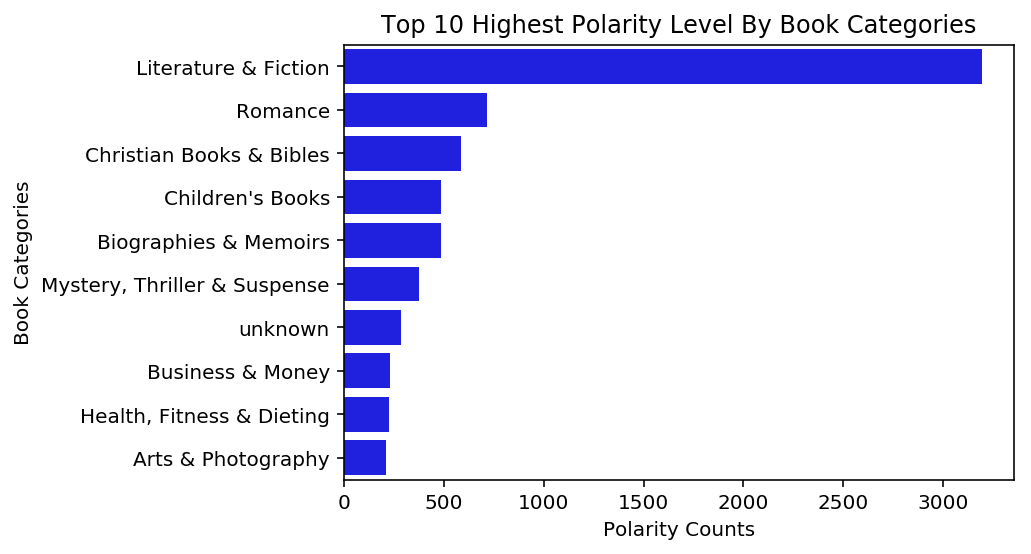

In [128]:
#Graph top 10 book categories by text polarity.
top_text_pol = sample.groupby("book_category", as_index=False)["text_pol"]\
.sum().sort_values("text_pol", ascending=False).head(10)

sns.barplot(x=top_text_pol['text_pol'],
            y=top_text_pol["book_category"],
            color='b').set(title='Top 10 Highest Polarity Level By Book Categories')
plt.xlabel('Polarity Counts')
plt.ylabel('Book Categories');

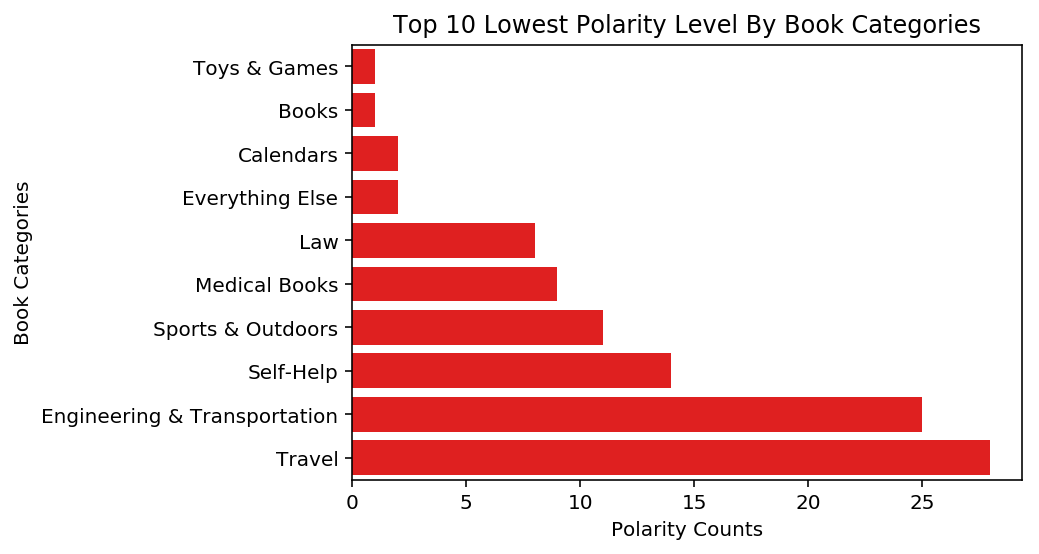

In [135]:
#Graph top 10 book categories by text polarity.
top_text_pol = sample.groupby("book_category", as_index=False)["text_pol"]\
.sum().sort_values("text_pol", ascending=True).head(10)

sns.barplot(x=top_text_pol['text_pol'],
            y=top_text_pol["book_category"],
            color='r').set(title='Top 10 Lowest Polarity Level By Book Categories')
plt.xlabel('Polarity Counts')
plt.ylabel('Book Categories');

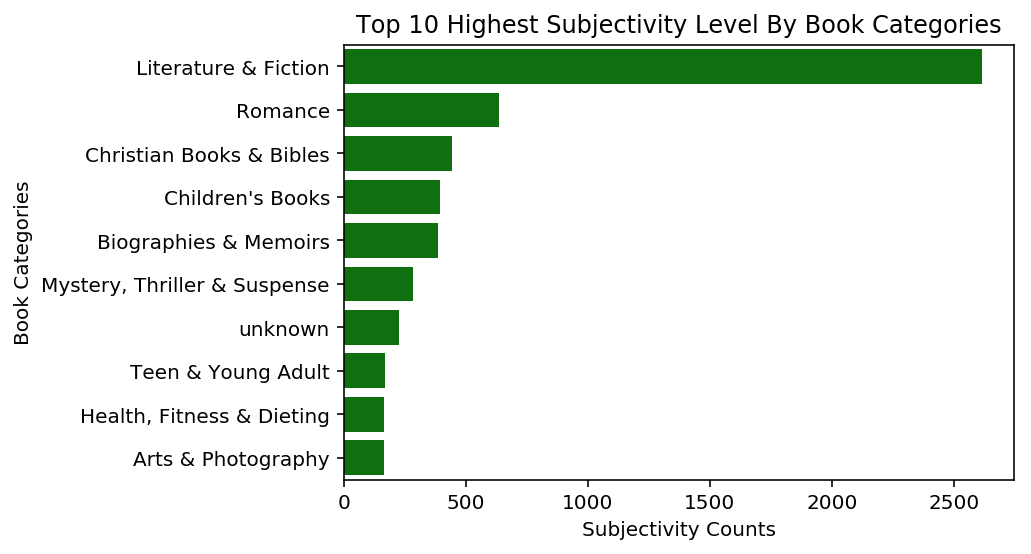

In [138]:
#Graph top 10 book categories by text polarity.
top_text_subj = sample.groupby("book_category", as_index=False)["text_subj"]\
.sum().sort_values("text_subj", ascending=False).head(10)

sns.barplot(x=top_text_subj['text_subj'],
            y=top_text_subj["book_category"],
            color='g').set(title='Top 10 Highest Subjectivity Level By Book Categories')
plt.xlabel('Subjectivity Counts')
plt.ylabel('Book Categories');

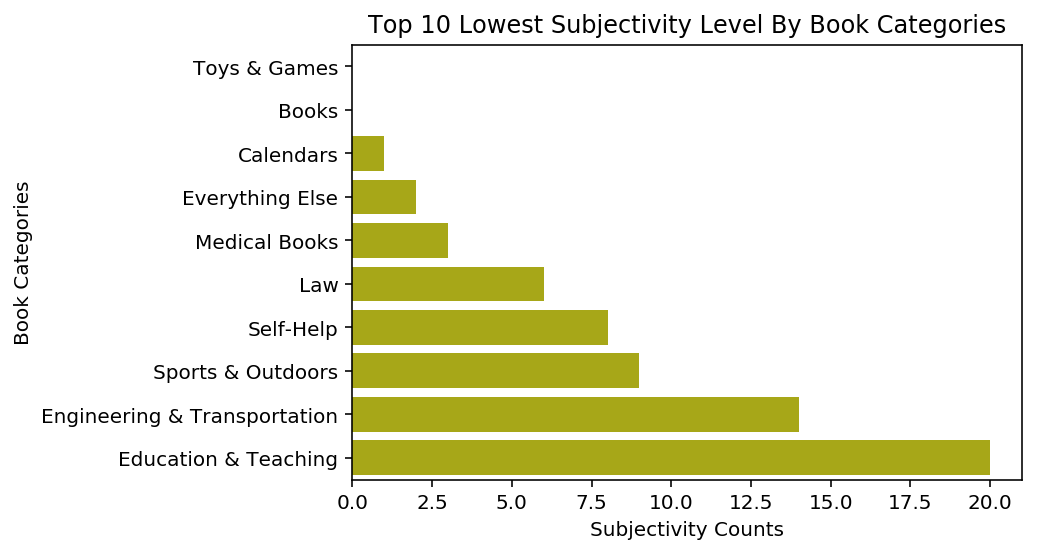

In [137]:
#Graph top 10 book categories by text polarity.
top_text_subj = sample.groupby("book_category", as_index=False)["text_subj"]\
.sum().sort_values("text_subj", ascending=True).head(10)

sns.barplot(x=top_text_subj['text_subj'],
            y=top_text_subj["book_category"],
            color='y').set(title='Top 10 Lowest Subjectivity Level By Book Categories')
plt.xlabel('Subjectivity Counts')
plt.ylabel('Book Categories');

<a id='Correlation Heatmap'></a>
### Correlation Heatmap
This heat-map shows the overall correlations between all features. The strongest correlations to the rating are text polarity and summary polarity then helpful review, and subjectivities are being the lowest correlations.

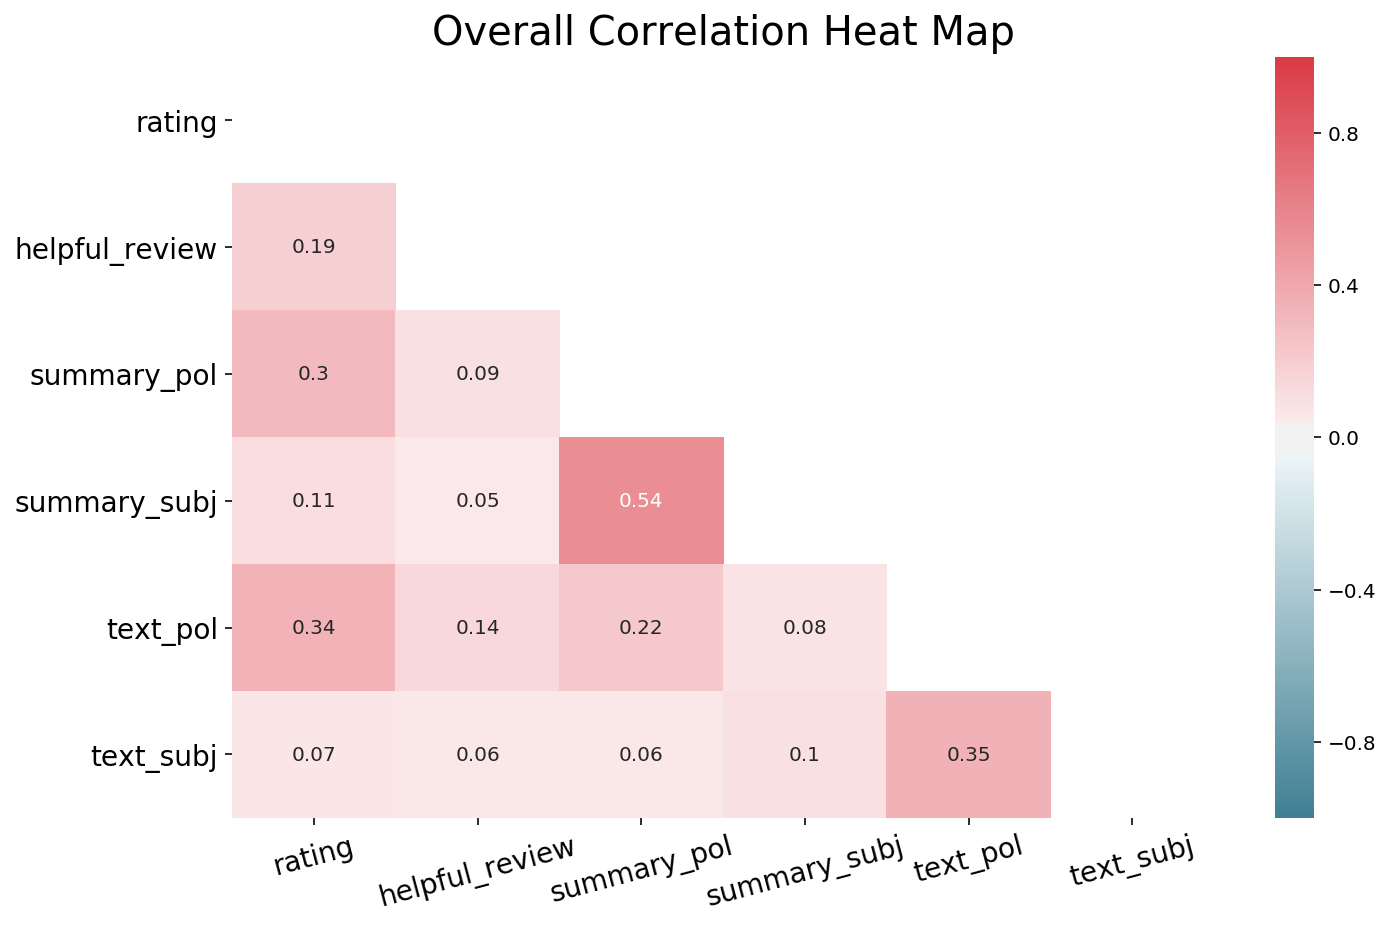

In [65]:
# Plot overall correlation heatmap
def correlation_heat_map(df):   
    corrs = round(amazon.corr(), 2)
    
    fig, ax = plt.subplots(figsize=(11,7))
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=15)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    plt.title('Overall Correlation Heat Map', fontsize=20)
    
correlation_heat_map(amazon)

<a id='Save Data for Modeling'></a>
# Save Data for Modeling

In [66]:
# Save data for modeling
amazon.to_csv('data/amazon_sample_modeling.csv', index=False)

In [67]:
# Load data to check if everything got saved correctly
amazon = pd.read_csv('data/amazon_sample_modeling.csv')
amazon.head()

,review_date,reviewer_id,reviewer_name,book_category,review_text,review_summary,rating,helpful_review,summary_pol,summary_subj,text_pol,text_subj
0,2006-01-18,A3SHA4Y9DHEK39,Chad Oberholtzer,Christian Books & Bibles,live church culture holiness rarely mentioned ...,great one,5,0,0.8,0.8,0.3,0.5
1,2008-03-16,A11M98R135HMSY,Paul Skinner,"Mystery, Thriller & Suspense",philip craigs finally got around first j w jac...,begining beautiful relationship,5,1,0.8,1.0,0.2,0.5
2,2013-02-26,AD20B29YQDZYQ,Amazon Customer,Literature & Fiction,storyline good reason finished filled way much...,ok,2,1,0.5,0.5,0.1,0.5
3,2013-07-16,AZR6CYHTQ9TL,Inez,Science Fiction & Fantasy,love apocalypse stories one really creeped lik...,oh bugs everywhere,5,1,0.0,0.0,0.4,0.4
4,2013-04-14,A14BTJRH9VNLJJ,Kurt A. Johnson,Biographies & Memoirs,sociopath sociopath person little conscience p...,interesting thought provoking,4,1,0.5,0.5,0.1,0.5
